# Import Required Libraries
Import the necessary libraries, including pandas and matplotlib.

In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the IPL-2022.csv Data
Use pandas to load the IPL-2022.csv file.

In [2]:
# Load the IPL-2022.csv Data
data_path = './../1-data/kaggle/IPL-2022.csv'  # specify the path to the data file
ipl_data = pd.read_csv(data_path)  # load the data into a pandas DataFrame

# Display the first few rows of the DataFrame to verify it loaded correctly
ipl_data.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


# Inspect the Data
Use pandas functions like head(), info(), and describe() to inspect the data.

In [3]:
# Inspect the Data
# Use the head() function to get the first 5 rows of the DataFrame
print(ipl_data.head())

# Use the info() function to get a concise summary of the DataFrame
print(ipl_data.info())

# Use the describe() function to generate descriptive statistics of the DataFrame
print(ipl_data.describe())

   match_id           date                                         venue  \
0         1  March 26,2022                      Wankhede Stadium, Mumbai   
1         2  March 27,2022                     Brabourne Stadium, Mumbai   
2         3  March 27,2022            Dr DY Patil Sports Academy, Mumbai   
3         4  March 28,2022                      Wankhede Stadium, Mumbai   
4         5  March 29,2022  Maharashtra Cricket Association Stadium,Pune   

       team1      team2  stage toss_winner toss_decision  first_ings_score  \
0    Chennai    Kolkata  Group     Kolkata         Field               131   
1      Delhi     Mumbai  Group       Delhi         Field               177   
2   Banglore     Punjab  Group      Punjab         Field               205   
3    Gujarat    Lucknow  Group     Gujarat         Field               158   
4  Hyderabad  Rajasthan  Group   Hyderabad         Field               210   

   first_ings_wkts  second_ings_score  second_ings_wkts match_winner   won

# Data Cleaning
Clean the data by handling missing values and outliers.

Missing values in each column:
match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

After dropping rows with missing values:
match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer    

/tmp/ipykernel_71446/1826463414.py:17: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = ipl_data_clean.quantile(0.25)
/tmp/ipykernel_71446/1826463414.py:18: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = ipl_data_clean.quantile(0.75)


ValueError: Can only compare identically-labeled Series objects

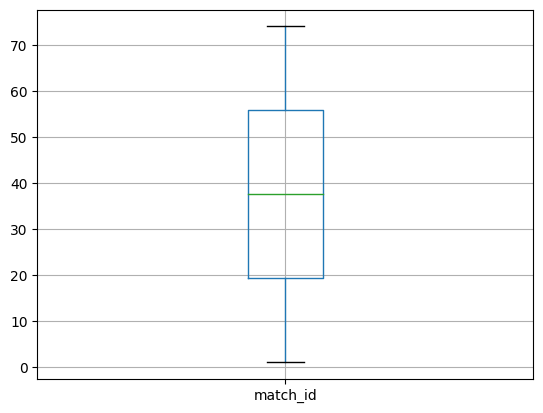

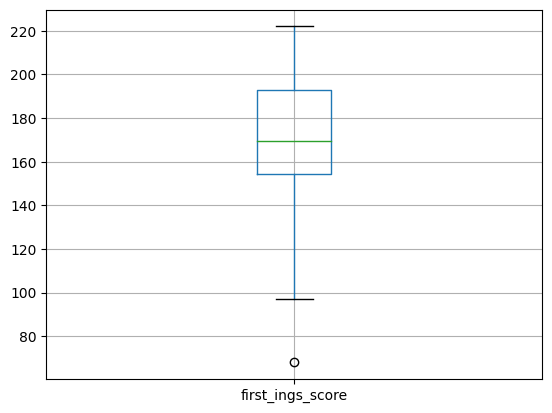

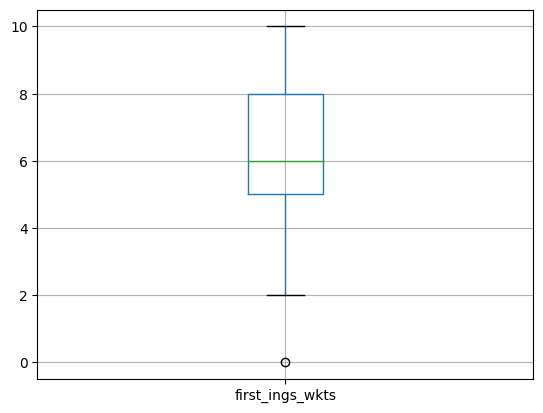

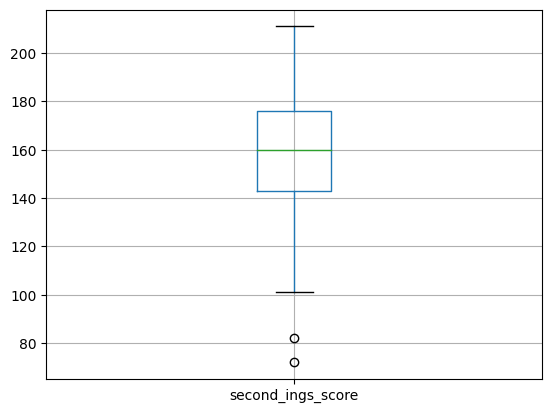

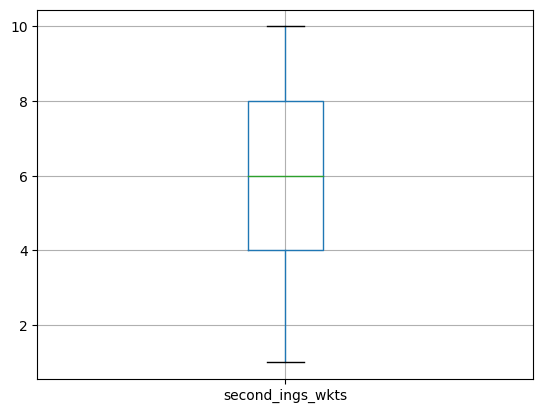

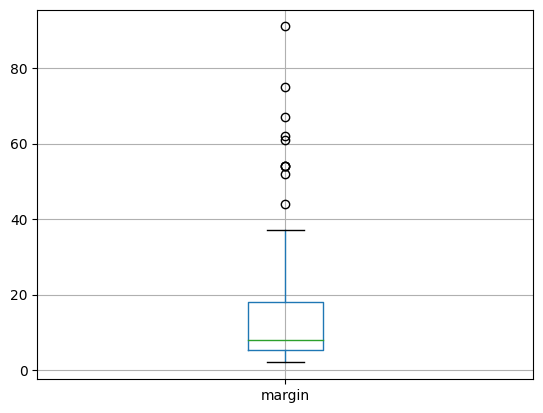

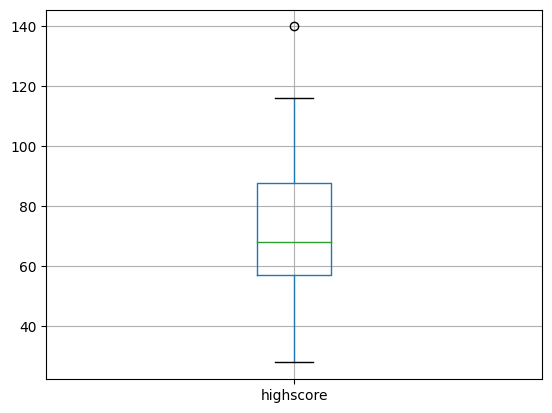

In [4]:
# Check for missing values
missing_values = ipl_data.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

# Drop rows with missing values
ipl_data_clean = ipl_data.dropna()
print("\nAfter dropping rows with missing values:")
print(ipl_data_clean.isnull().sum())

# Check for outliers using boxplots
for column in ipl_data_clean.columns:
    if ipl_data_clean[column].dtype in ['int64', 'float64']:
        plt.figure()
        ipl_data_clean.boxplot([column])

# Handle outliers - this is just an example, you might need to handle outliers differently based on the data
Q1 = ipl_data_clean.quantile(0.25)
Q3 = ipl_data_clean.quantile(0.75)
IQR = Q3 - Q1

# Define a function to handle outliers
def handle_outliers(value):
    if (value < (Q1 - 1.5 * IQR)) | (value > (Q3 + 1.5 * IQR)):
        return value.median()
    else:
        return value

# Convert the DataFrame to numeric
ipl_data_clean = ipl_data_clean.apply(pd.to_numeric, errors='coerce')

# Apply the function to the DataFrame
ipl_data_clean = ipl_data_clean.apply(handle_outliers)

# Display the cleaned data
print("\nCleaned data:")
print(ipl_data_clean.head())

# Data Analysis
Perform data analysis by exploring relationships between different columns.

In [ ]:
# Data Analysis
# Perform data analysis by exploring relationships between different columns

# Importing necessary libraries for data analysis
import seaborn as sns

# Correlation matrix
corr_matrix = ipl_data_clean.corr()
print("Correlation matrix:")
print(corr_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Pairplot of the DataFrame
sns.pairplot(ipl_data_clean)
plt.show()

# Countplot of a categorical column (replace 'column_name' with the name of a categorical column)
sns.countplot(x='column_name', data=ipl_data_clean)
plt.title('Countplot of column_name')
plt.show()

# Boxplot of a numerical column grouped by a categorical column (replace 'num_column' and 'cat_column' with appropriate column names)
sns.boxplot(x='cat_column', y='num_column', data=ipl_data_clean)
plt.title('Boxplot of num_column grouped by cat_column')
plt.show()

# Scatterplot of two numerical columns (replace 'num_column1' and 'num_column2' with appropriate column names)
sns.scatterplot(x='num_column1', y='num_column2', data=ipl_data_clean)
plt.title('Scatterplot of num_column1 vs num_column2')
plt.show()

# Data Visualization
Visualize the data using matplotlib to gain more insights.

In [ ]:
# Data Visualization
# Importing necessary libraries for data visualization
import seaborn as sns
import random

# Histograms for each numeric column
num_columns = ipl_data_clean.select_dtypes(include=['int64', 'float64']).columns
colors = random.sample(rainbow_colors, len(num_columns))

# Calculate the number of rows and columns for the subplot grid
num_rows = (len(num_columns) + 2) // 3  # Add 2 to account for the additional plots
num_cols = min(len(num_columns), 3)

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over the numeric columns and plot the histograms
for i, (column, color) in enumerate(zip(num_columns, colors)):
    axes[i].hist(ipl_data_clean[column], bins=50, color=color)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(len(num_columns), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

# Bar plot for each categorical column (replace 'cat_column' with the name of a categorical column)
cat_columns = ipl_data_clean.select_dtypes(include=['object']).columns
for column in cat_columns:
    plt.figure(figsize=(10,4))
    ipl_data_clean[column].value_counts().plot(kind='bar')
    plt.title(f'Bar plot of {column}')
    plt.show()

# Boxplot for each numeric column
num_columns = ipl_data_clean.select_dtypes(include=['int64', 'float64']).columns
for column in num_columns:
    plt.figure(figsize=(5,4))
    ipl_data_clean.boxplot(column)
    plt.title(f'Box plot of {column}')
    plt.show()

# Pairplot of the DataFrame
sns.pairplot(ipl_data_clean)
plt.title('Pairplot of all columns')
plt.show()

# Correlation matrix heatmap
corr_matrix = ipl_data_clean.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()